<a href="https://colab.research.google.com/github/rajviishah/CMPE-255-Data-Mining/blob/main/Performance-Metrics/Regression-Muller-Loop-Performance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install xgboost

In [1]:
import time
import pandas as pd
import numpy as np
import seaborn
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

In [2]:
dataframe = pd.read_csv("/content/drive/MyDrive/CMPE 257 - Project/sarjak_new_clean_train.csv")

In [3]:
dataframe.head()

,Unnamed: 0,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,Age_House,TotalBsmtBath,TotalBath,TotalSA
0,0,3,1,3,3,0,4,0,5,2,...,0,0,0,2,2008,208500.0,5,1.5,2.5,2566.0
1,1,3,1,3,3,0,2,0,24,1,...,0,0,0,5,2007,181500.0,31,0.0,2.0,2524.0
2,2,3,1,2,3,0,4,0,5,2,...,0,0,0,9,2008,223500.0,7,1.5,2.5,2706.0
3,3,3,1,2,3,0,0,0,6,2,...,0,0,0,2,2006,140000.0,91,1.5,1.0,2473.0
4,4,3,1,2,3,0,2,0,15,2,...,0,0,0,12,2008,250000.0,8,1.5,2.5,3343.0


In [4]:
dataframe.columns

Index(['Unnamed: 0', 'MSZoning', 'Street', 'LotShape', 'LandContour',
       'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
       'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond',
       'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical',
       'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType',
       'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'SaleType',
       'SaleCondition', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt

In [5]:
dataframe = dataframe.drop(['Unnamed: 0'], axis = 1)
dataframe

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,Age_House,TotalBsmtBath,TotalBath,TotalSA
0,3,1,3,3,0,4,0,5,2,2,...,0,0,0,2,2008,208500.0,5,1.5,2.5,2566.0
1,3,1,3,3,0,2,0,24,1,2,...,0,0,0,5,2007,181500.0,31,0.0,2.0,2524.0
2,3,1,2,3,0,4,0,5,2,2,...,0,0,0,9,2008,223500.0,7,1.5,2.5,2706.0
3,3,1,2,3,0,0,0,6,2,2,...,0,0,0,2,2006,140000.0,91,1.5,1.0,2473.0
4,3,1,2,3,0,2,0,15,2,2,...,0,0,0,12,2008,250000.0,8,1.5,2.5,3343.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,3,1,3,3,0,4,0,8,2,2,...,0,0,0,8,2007,175000.0,8,0.0,2.5,2600.0
1456,3,1,3,3,0,4,0,14,2,2,...,0,0,0,2,2010,210000.0,32,1.5,2.0,3615.0
1457,3,1,3,3,0,4,0,6,2,2,...,0,0,2500,5,2010,266500.0,69,0.0,2.0,3492.0
1458,3,1,3,3,0,4,0,12,2,2,...,0,0,0,4,2010,142125.0,60,1.5,1.0,2156.0


In [6]:
X = dataframe.drop(['SalePrice'], axis=1)
y = dataframe['SalePrice']

In [ ]:
normalized_X=(X-X.min())/(X.max()-X.min())
normalized_X

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,Age_House,TotalBsmtBath,TotalBath,TotalSA
0,0.75,1.0,1.000000,1.0,0.0,1.0,0.0,0.208333,0.250,0.285714,...,0.0,0.0,0.0,0.00000,0.090909,0.50,0.036765,0.333333,0.714286,0.195481
1,0.75,1.0,1.000000,1.0,0.0,0.5,0.0,1.000000,0.125,0.285714,...,0.0,0.0,0.0,0.00000,0.363636,0.25,0.227941,0.000000,0.571429,0.191802
2,0.75,1.0,0.666667,1.0,0.0,1.0,0.0,0.208333,0.250,0.285714,...,0.0,0.0,0.0,0.00000,0.727273,0.50,0.051471,0.333333,0.714286,0.207742
3,0.75,1.0,0.666667,1.0,0.0,0.0,0.0,0.250000,0.250,0.285714,...,0.0,0.0,0.0,0.00000,0.090909,0.00,0.669118,0.333333,0.285714,0.187336
4,0.75,1.0,0.666667,1.0,0.0,0.5,0.0,0.625000,0.250,0.285714,...,0.0,0.0,0.0,0.00000,1.000000,0.50,0.058824,0.333333,0.714286,0.263531
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,0.75,1.0,1.000000,1.0,0.0,1.0,0.0,0.333333,0.250,0.285714,...,0.0,0.0,0.0,0.00000,0.636364,0.25,0.058824,0.000000,0.714286,0.198459
1456,0.75,1.0,1.000000,1.0,0.0,1.0,0.0,0.583333,0.250,0.285714,...,0.0,0.0,0.0,0.00000,0.090909,1.00,0.235294,0.333333,0.571429,0.287353
1457,0.75,1.0,1.000000,1.0,0.0,1.0,0.0,0.250000,0.250,0.285714,...,0.0,0.0,0.0,0.16129,0.363636,1.00,0.507353,0.000000,0.571429,0.276581
1458,0.75,1.0,1.000000,1.0,0.0,1.0,0.0,0.500000,0.250,0.285714,...,0.0,0.0,0.0,0.00000,0.272727,1.00,0.441176,0.333333,0.285714,0.159573


In [ ]:
#split the features and labels into  train and test data
X_train, X_test, y_train, y_test = train_test_split(normalized_X, y, test_size=0.2, random_state=1)

In [ ]:
names = ["Random Forest Regressor", "KNeighbours Regressor", "Gradient Boosting Regressor", "XG Boost Regressor", "Linear Regression"]

In [ ]:
classifiers = [
    #MLPRegressor(random_state=1, activation = 'logistic', max_iter=150),
    RandomForestRegressor(max_depth=3, random_state=1, n_estimators=10),
    KNeighborsRegressor(n_neighbors=3),
    GradientBoostingRegressor(random_state=1),
    XGBRegressor(),
    LinearRegression()
]

In [ ]:
max_score = 1
max_class = ''
# iterate over classifiers
def rmse(predictions, targets):
    return np.sqrt(((predictions - targets) ** 2).mean())
for name, clf in zip(names, classifiers):
    start_time = time.time()
    clf.fit(X_train, y_train)
    score = 100.0 * clf.score(X_test, y_test)
    print('Classifier = %s, Score (test, accuracy) = %.2f,' %(name, score), 'Training time = %.2f seconds' % (time.time() - start_time))
    
    y_pred = clf.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    print('Classifier = %s, Score (test, MSE) = %.2f,' %(name, mse), 'Training time = %.2f seconds' % (time.time() - start_time))
    
    rmse_val = rmse(y_pred, y_test)
    print('Classifier = %s, Score (test, rmse_val) = %.2f,' %(name, rmse_val), 'Training time = %.2f seconds' % (time.time() - start_time))

    mae = mean_absolute_error(y_test, y_pred)
    print('Classifier = %s, Score (test, MAE) = %.2f,' %(name, mae), 'Training time = %.2f seconds' % (time.time() - start_time))
    
    r2 = r2_score(y_test, y_pred)
    print('Classifier = %s, Score (test, R2-error) = %.2f,' %(name, r2), 'Training time = %.2f seconds' % (time.time() - start_time))
    
    
    print('---------------------------------------------------------------------------------------------------------------')


    if r2 < max_score:
        clf_best = clf
        max_score = r2
        max_class = name

Classifier = Random Forest Regressor, Score (test, accuracy) = 82.31, Training time = 0.09 seconds
Classifier = Random Forest Regressor, Score (test, MSE) = 1261634509.93, Training time = 0.10 seconds
Classifier = Random Forest Regressor, Score (test, rmse_val) = 35519.49, Training time = 0.10 seconds
Classifier = Random Forest Regressor, Score (test, MAE) = 24988.29, Training time = 0.10 seconds
Classifier = Random Forest Regressor, Score (test, R2-error) = 0.82, Training time = 0.10 seconds
---------------------------------------------------------------------------------------------------------------
Classifier = KNeighbours Regressor, Score (test, accuracy) = 77.01, Training time = 0.02 seconds
Classifier = KNeighbours Regressor, Score (test, MSE) = 1639664336.71, Training time = 0.03 seconds
Classifier = KNeighbours Regressor, Score (test, rmse_val) = 40492.77, Training time = 0.03 seconds
Classifier = KNeighbours Regressor, Score (test, MAE) = 23292.13, Training time = 0.03 second

In [ ]:
print('Best --> Classifier = %s, Score (test, r2) = %.2f' %(max_class, max_score))
#plot the output of the various algorithms

Best --> Classifier = KNeighbours Regressor, Score (test, r2) = 0.77


In [ ]:
#feature importance
#for RandomForestRegressor
clf = RandomForestRegressor(max_depth=3, random_state=1, n_estimators=10)
clf.fit(X_train, y_train)
clf.feature_importances_
#len(clf.feature_importances_)

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.00581427,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.4504101 , 0.        , 0.01518612,
       0.00236704, 0.        , 0.00159166, 0.        , 0.        ,
       0.        , 0.        , 0.01658566, 0.        , 0.        ,
       0.        , 0.0063791 , 0.        , 0.        , 0.        ,
       0.00265855, 0.        , 0.        , 0.        , 0.0020554 ,
       0.00229612, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.00663032, 0.     

<BarContainer object of 79 artists>

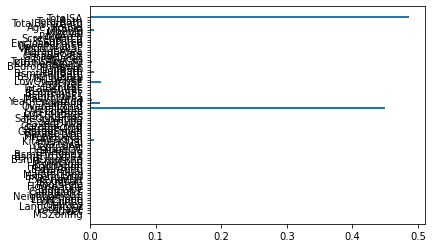

In [ ]:
pyplot.barh(normalized_X.columns, clf.feature_importances_)

Text(0.5, 0, 'Random Forest Feature Importance')

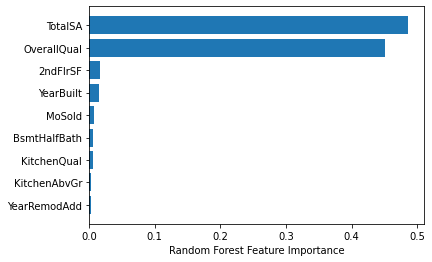

In [ ]:
sorted_idx = clf.feature_importances_.argsort()[70:]
pyplot.barh(normalized_X.columns[sorted_idx], clf.feature_importances_[sorted_idx])
pyplot.xlabel("Random Forest Feature Importance")

Feature: 0, Score: -3694.02672
Feature: 1, Score: -5106.41823
Feature: 2, Score: -784.68055
Feature: 3, Score: 9311.96631
Feature: 4, Score: -71840.66960
Feature: 5, Score: -1747.07916
Feature: 6, Score: 10618.99986
Feature: 7, Score: 9961.09088
Feature: 8, Score: -3055.25596
Feature: 9, Score: -60266.17026
Feature: 10, Score: -13379.13252
Feature: 11, Score: -7592.40104
Feature: 12, Score: 13398.99720
Feature: 13, Score: 37231.77487
Feature: 14, Score: -20509.39799
Feature: 15, Score: 12687.47380
Feature: 16, Score: 20094.56002
Feature: 17, Score: 13391.29521
Feature: 18, Score: -7102.79742
Feature: 19, Score: 21688.71321
Feature: 20, Score: -7498.85135
Feature: 21, Score: -6586.19736
Feature: 22, Score: 36498.85938
Feature: 23, Score: 10501.84338
Feature: 24, Score: 1319.24600
Feature: 25, Score: -15924.42110
Feature: 26, Score: 2795.17594
Feature: 27, Score: -8097.06363
Feature: 28, Score: -6041.40810
Feature: 29, Score: 1637.57005
Feature: 30, Score: 29773.69989
Feature: 31, Score:

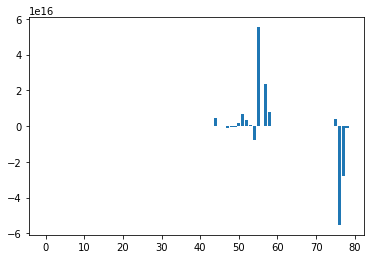

In [ ]:
#Linear Regression
model = LinearRegression()
# fit the model
model.fit(X_train, y_train)
# get importance
importance = model.coef_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)[:10]
pyplot.show()

Text(0.5, 0, 'Random Forest Feature Importance')

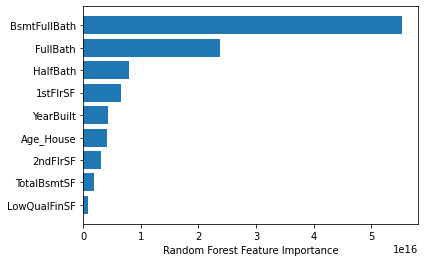

In [ ]:
sorted_idx = model.coef_.argsort()[70:]
pyplot.barh(normalized_X.columns[sorted_idx], model.coef_[sorted_idx])
pyplot.xlabel("Linear Regression Feature Importance")

In [ ]:
#feature importance

clf = GradientBoostingRegressor(random_state=1)
clf.fit(X_train, y_train)
clf.feature_importances_
#len(clf.feature_importances_)

array([2.83605639e-03, 0.00000000e+00, 1.24383325e-04, 6.36284617e-04,
       0.00000000e+00, 6.00998264e-05, 1.28895602e-03, 4.26798341e-03,
       7.34681037e-04, 0.00000000e+00, 0.00000000e+00, 3.04992165e-04,
       3.47337812e-04, 8.90047399e-06, 8.04053473e-04, 0.00000000e+00,
       5.61539369e-05, 5.32260685e-05, 0.00000000e+00, 5.66974914e-05,
       2.94619073e-03, 0.00000000e+00, 2.81244942e-03, 1.43061497e-03,
       2.14681418e-05, 0.00000000e+00, 0.00000000e+00, 1.83699490e-03,
       0.00000000e+00, 1.48538270e-02, 1.06182687e-03, 1.02632218e-02,
       5.25753973e-03, 8.37228028e-05, 4.41012718e-04, 0.00000000e+00,
       0.00000000e+00, 5.68437198e-07, 2.19549388e-03, 8.83666992e-05,
       5.47244130e-03, 1.73448472e-02, 2.43447574e-01, 6.62398834e-03,
       1.20688835e-02, 1.19058237e-02, 3.68482986e-03, 2.03808374e-02,
       3.24697362e-04, 4.29359119e-03, 4.31960502e-03, 2.54413548e-03,
       1.35164619e-02, 0.00000000e+00, 1.71169517e-02, 6.38540790e-05,
      

<BarContainer object of 79 artists>

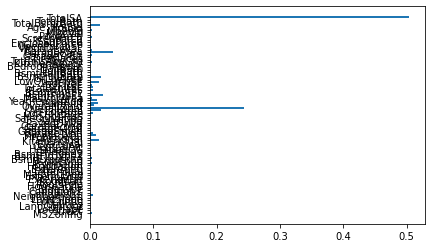

In [ ]:
pyplot.barh(normalized_X.columns, clf.feature_importances_)

Text(0.5, 0, 'Random Forest Feature Importance')

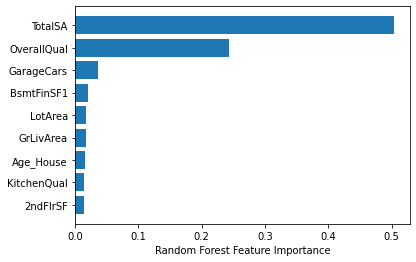

In [ ]:
sorted_idx = clf.feature_importances_.argsort()[70:]
pyplot.barh(normalized_X.columns[sorted_idx], clf.feature_importances_[sorted_idx])
pyplot.xlabel("Random Forest Feature Importance")

In [ ]:

clf = XGBRegressor()
clf.fit(X_train, y_train)
clf.feature_importances_
#len(clf.feature_importances_)

[06:43:23] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


array([6.2412801e-03, 0.0000000e+00, 1.9323798e-03, 7.3001552e-03,
       0.0000000e+00, 3.5930567e-05, 5.1853230e-04, 6.4081349e-03,
       1.8916592e-03, 4.9685659e-03, 0.0000000e+00, 7.0686400e-04,
       7.4331685e-05, 1.0221751e-02, 1.9242787e-03, 0.0000000e+00,
       1.1365425e-03, 6.3814029e-02, 1.4854147e-03, 7.8878889e-04,
       1.8069344e-02, 5.7552796e-04, 9.8162387e-03, 6.6729477e-03,
       1.5783365e-03, 0.0000000e+00, 0.0000000e+00, 1.8490680e-02,
       0.0000000e+00, 7.0052542e-02, 2.2957039e-03, 3.0146357e-02,
       5.8557458e-02, 0.0000000e+00, 3.3335474e-03, 2.3128998e-03,
       0.0000000e+00, 0.0000000e+00, 4.8250342e-03, 0.0000000e+00,
       1.7912321e-02, 7.4654561e-03, 2.3308730e-01, 4.5572994e-03,
       8.6376099e-03, 1.2503746e-02, 3.0384245e-03, 1.2785253e-02,
       1.8850532e-03, 2.5986156e-03, 3.7812078e-03, 5.6998516e-03,
       1.1701951e-02, 0.0000000e+00, 1.0261299e-02, 2.7024087e-03,
       0.0000000e+00, 5.2496633e-03, 0.0000000e+00, 1.9046004e

<BarContainer object of 79 artists>

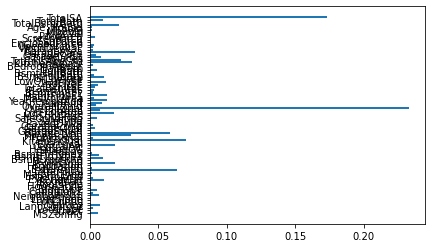

In [ ]:
pyplot.barh(normalized_X.columns, clf.feature_importances_)

Text(0.5, 0, 'Random Forest Feature Importance')

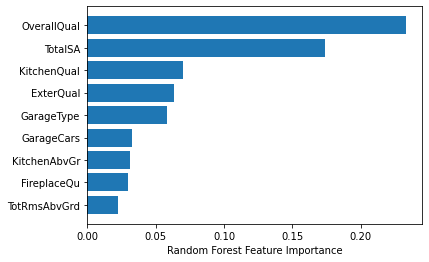

In [ ]:
sorted_idx = clf.feature_importances_.argsort()[70:]
pyplot.barh(normalized_X.columns[sorted_idx], clf.feature_importances_[sorted_idx])
pyplot.xlabel("Random Forest Feature Importance")

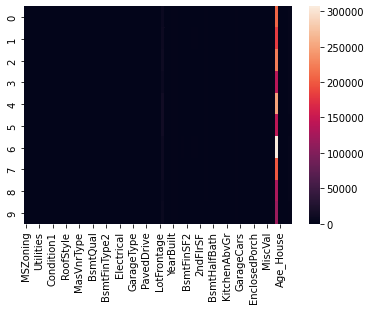

In [11]:
seaborn.heatmap(dataframe[:10])

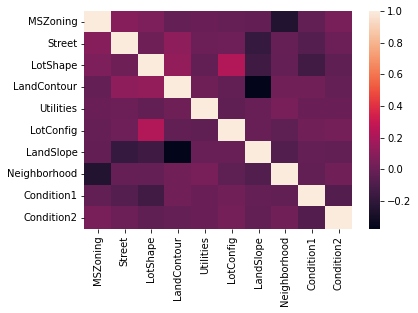

In [17]:
import seaborn as sns

Var_Corr = dataframe.iloc[: , :10].corr()
# plot the heatmap and annotation on it
sns.heatmap(Var_Corr, xticklabels=Var_Corr.columns, yticklabels=Var_Corr.columns)